
# Пересчет концентраций для Excel-файлов в сырыми данными 

Программа пересчитывает данные в 'количество на тромбоцит' (Copy number per platelet)

Для пересчета используются данные из статей (ссылки в таблице Calib.xlsx)

Программа выдает коэффициенты корреляции, графики корреляции и создает таблицу для проб с пересчитанными концентрациями


# Важно!

Перед обработкой Excel файлов нужно убедиться, что первая колонка содержит только названия белков. 

Для этого в каждом файле Excel:
1. Сортировать первую колонку по алфавиту
2. В конце будут строчки просто с цифрами - удалить их

In [1]:
# Загрузка библиотек

import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from scipy import optimize, stats
from itertools import chain

%matplotlib inline

In [2]:
#№ Загрузка файла с функциями

%run ./Functions.ipynb

In [3]:
### Загрузка таблицы данных, по которым будет производиться пересчет концентраций
# В файле имена должны быть под 'Majority protein IDs', а количество под 'Copy number'
# Важно чтобы не повторялись белки

# Название калибровочного файла
ref_t='Calib.xlsx'

# Путь к файлу

data = pd.read_excel('Data/'+ref_t,sheet_name='Values')

# Создание массива данных
dfb = pd.DataFrame(data)
ref = dfb[['Accession number', 'Concentration','Deviation']].copy()

FAT (yes/no): yes
iBAQ 1
Enter FAT data for CD42b, CD61, FSC: 100 100 100
iBAQ 1_20221027115631
Enter FAT data for CD42b, CD61, FSC: 100 90 99
iBAQ 1_20221027135604
Enter FAT data for CD42b, CD61, FSC: 100 100 100
iBAQ 2
Enter FAT data for CD42b, CD61, FSC: 200 200 200
iBAQ 2_20221027205557
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 2_20221027225518
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 3
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 3_20221028121348
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 3_20221028161251
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 4
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 4_20221028211326
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 4_20221028231246
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 5
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 5_20221029041332
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 5_20221029061252
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 6
Enter FAT data for CD42b, CD61, FSC: 1 1 1
iBAQ 6_202

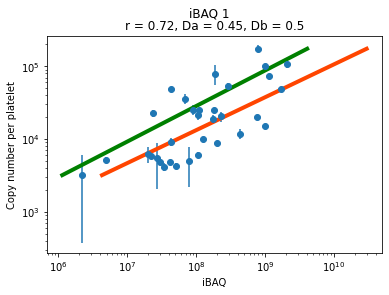

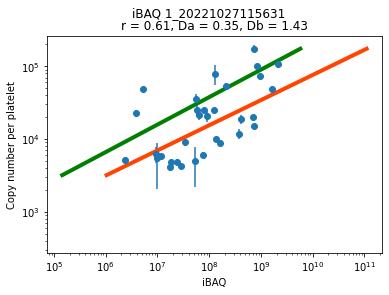

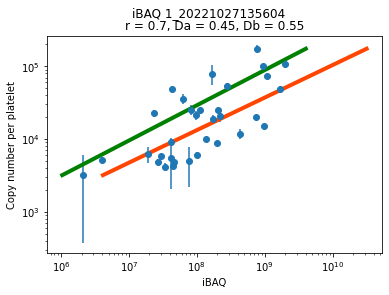

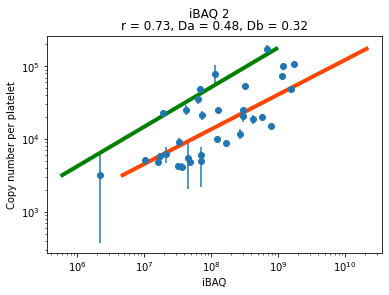

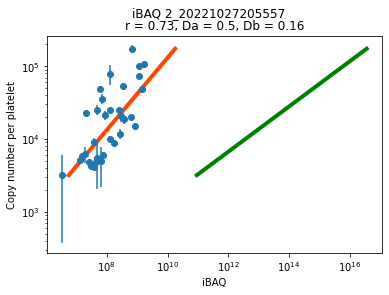

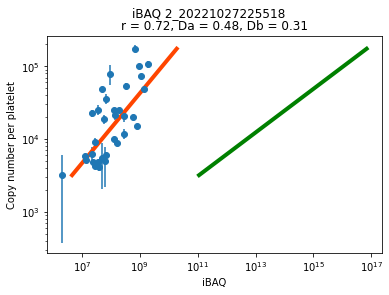

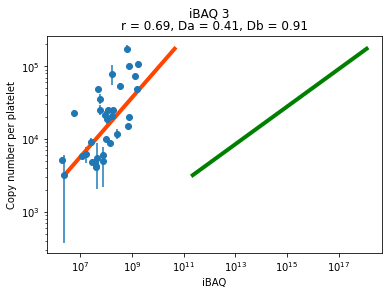

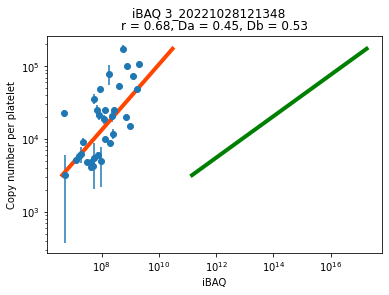

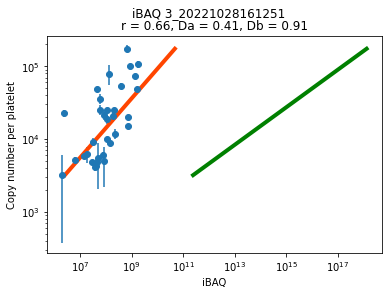

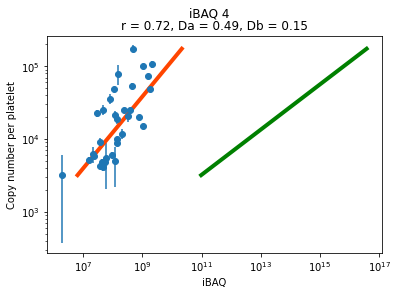

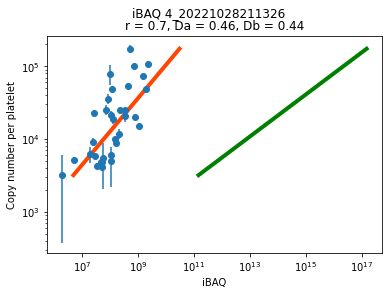

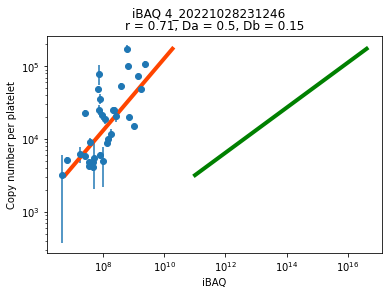

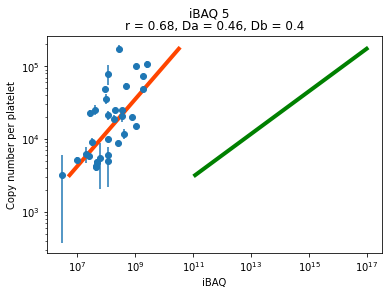

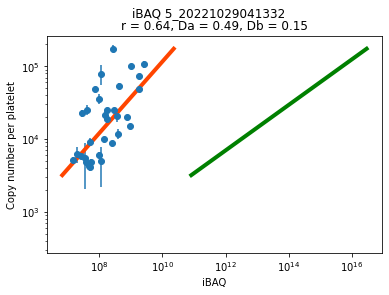

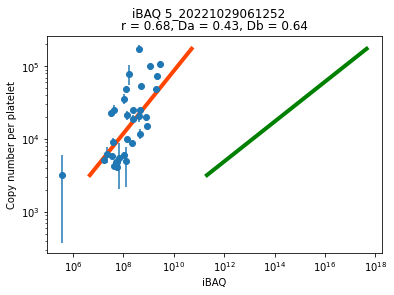

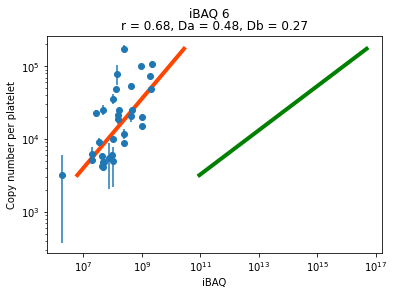

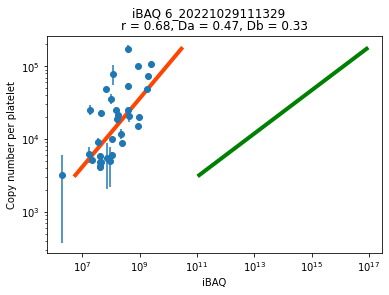

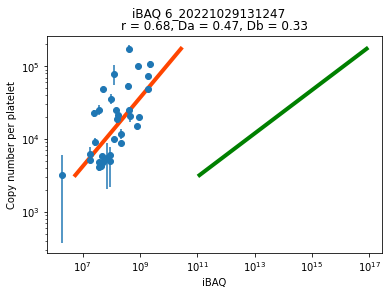

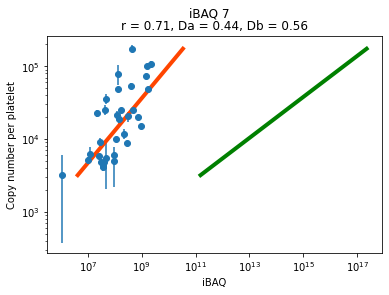

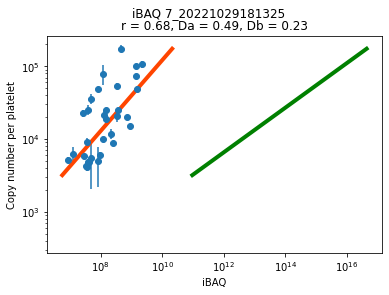

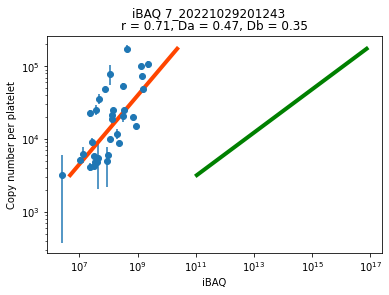

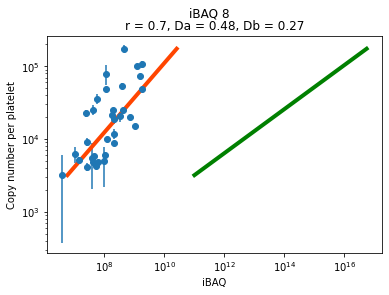

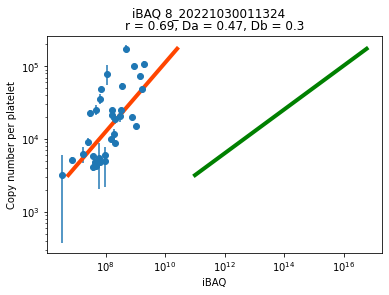

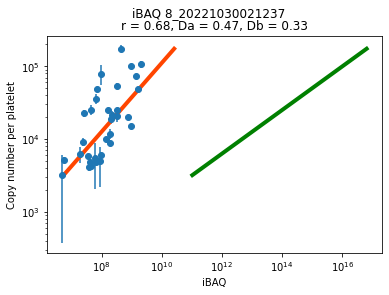

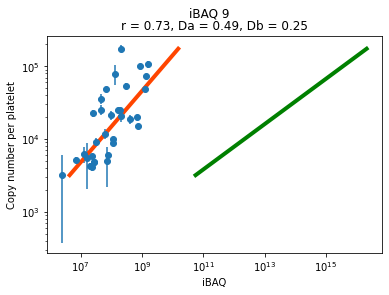

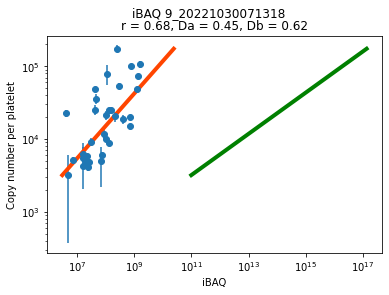

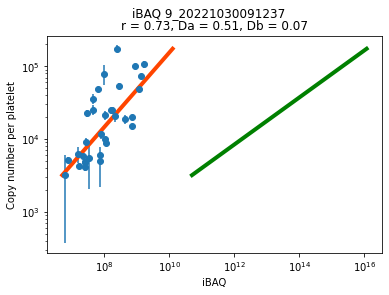

In [36]:
## Визуализация корреляций и сохранение для ОДНОГО донора или одной сборной таблицы. 
# Для пересчета используются данные ФАТ, которые нужно вводить руками или написать, что данных ФАТа нет

# Названия таблицы Excel для данного донора или для сборного файла

path = 'Sample data'

rcofdat = []
p, h = initial(path)
c, r, da, db, rec = coef(p, h, path,ref)
pt = recalc(p, h, da, db,rec, path)
rcofdat.append(r)

for j in range(0,len(h)-1):
    plt.errorbar(c[j],ref.iloc[:,1].tolist(),yerr = ref.iloc[:,2].tolist(), fmt = 'o')
    thpl=[]
    m1 = min(ref.iloc[:,1])
    m2 = max(ref.iloc[:,1])
    thpl = np.linspace(m1, m2, 10)
    plt.plot(np.power(thpl*np.power(10,-db[j][0]),1/da[j][0]),thpl, linewidth=4,color='orangered')
    plt.plot(np.power(thpl*np.power(10,-db[j][0]*rec[j][0]),1/(da[j][0]*rec[j][0])),thpl, linewidth=4,color='green')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('iBAQ')
    plt.ylabel('Copy number per platelet')
    plt.suptitle(h[j+1])
    plt.title('r = '+str(round(r[j][0][0][1], 2)) + ', Da = '+str(round(da[j][0], 2)) + ', Db = '+str(round(db[j][0], 2)) )
    plt.show()

In [ ]:
# Сохранение в отдельный файл Excel

#Название файла
fin_name = 'Sample'

#Сохранение

pt.to_excel(r'Concentrations/'+ fin_name+'.xlsx', index = False)

In [18]:
# Подсчет среднего значения корреляции. Массив корреляций - rcofdat

flatten_r = list(chain.from_iterable(list(chain.from_iterable(rcofdat))))
average = sum(flatten_r) / len(flatten_r)
sdd = np.std(flatten_r)
print(average,sdd)

[[1.         0.69369573]
 [0.69369573 1.        ]] 0.15436586439764888


# Если используется не сборный файл, а отдельные файлы для доноров:

In [6]:
### Применяем все функции пересчета для всех файлов в папке

# Получаем название всех файлов

names=[]
for root, dirs, files in os.walk('Data'):
    for filename in files:
        if (filename!='Calib.xlsx'):
            names=np.append(names,filename)

## Пересчитываем для всех файлов
# Нужно пересчитывать для какой-то группы, а не всех файлов, то вписываются названия файлов в массив names[] (без .xlsx)

rcofdat_d = []
for i in names:
    print(i)
    nm=i[:-5]
    p, h = initial(nm)
    c, r, da, db, rec = coef(p, h,nm,ref)
    pt = recalc(p, h, da, db,rec, nm)
    rcofdat_d.append(r)
    
# Сохранение в отдельный файл Excel

    pt.to_excel(r'Concentrations/'+ nm + '.xlsx', index = False)

Sample data.xlsx
FAT (yes/no): no


In [7]:
# Подсчет среднего значения корреляции. Массив корреляций - rcofdat_d

flatten_r = list(chain.from_iterable(list(chain.from_iterable(rcofdat_d))))
average = sum(flatten_r) / len(flatten_r)
sdd = np.std(flatten_r)
print(average,sdd)

[[1.         0.69369573]
 [0.69369573 1.        ]] 0.15436586439764888


# Важно!

## Открыть итоговый файл и назвать по имени донора